In [1]:
from multi_agents.graph.builder import GraphBuilder
from multi_agents.graph.state import AgentState
import logging

USER_AGENT environment variable not set, consider setting it to identify your requests.
/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/src/multi_agents/tools/search_tools.py:9: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  self.tavily = TavilySearchResults()
/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/src/multi_agents/tools/search_tools.py:10: LangChainDeprecationWarning: The class `GoogleSearchAPIWrapper` was deprecated in LangChain 0.0.33 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-google-community package and sh

In [2]:
graph_builder = GraphBuilder()

In [3]:
graph_builder

In [4]:
app = graph_builder.build_graph()

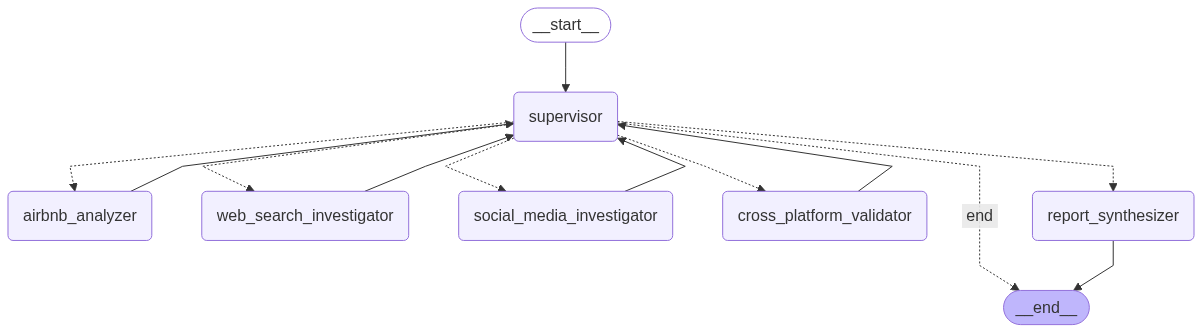

In [5]:
app

In [6]:
query = "Find the online identity of the host at https://www.airbnb.com/users/show/532236013"

initial_state = AgentState(
    original_query=query,
    plan=[],
    past_steps=[],
    aggregated_results={},
    final_report="",
    messages=[]
)

In [7]:
final_state = app.invoke(initial_state)



> Entering new AgentExecutor chain...
```
Thought: The user has provided a URL to an Airbnb host's profile. I need to gather information about this host. I will start by using the get_airbnb_profile_details tool to extract comprehensive profile information.
Action: get_airbnb_profile_details
Action Input: https://www.airbnb.com/users/show/532236013
```None

Traceback (most recent call last):
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/.venv/lib/python3.12/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/.venv/lib/python3.12/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/.venv/lib/python3.12/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-ide

The get_airbnb_profile_details tool did not return any information. This could be due to the profile being inaccessible or an issue with the tool. I will try using another tool to gather information. Next, I will use the get_airbnb_profile_places_visited tool to see if I can extract any travel history from the host's profile.

```
Action: get_airbnb_profile_places_visited
Action Input: https://www.airbnb.com/users/show/532236013
```None

Traceback (most recent call last):
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/.venv/lib/python3.12/site-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/.venv/lib/python3.12/site-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-identity-revelalion-and-reporting/.venv/lib/python3.12/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/mohamed-stifi/Desktop/intern-with-hafssa/multi-agent-system-for-ide

KeyboardInterrupt: 

In [2]:
from langchain_openai import ChatOpenAI
from multi_agents.constants.constants import Constants
llm = ChatOpenAI(
    base_url=Constants.OPENROUTER_BASE_URL,
    api_key=Constants.OPENROUTER_API_KEY,
    model_name=Constants.DEFAULT_MODEL,
    temperature=0.1,
    max_tokens=4096
)

In [4]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x741d7e7aae10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x741d69f9e750>, root_client=<openai.OpenAI object at 0x741d7e7b9340>, root_async_client=<openai.AsyncOpenAI object at 0x741d7e7ab590>, model_name='openai/gpt-4o', temperature=0.1, model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://openrouter.ai/api/v1', max_tokens=4096)

In [5]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_messages([
            ("system", """You are an expert digital investigator supervisor. Analyze the user query and create a step-by-step investigation plan.
             
             Available worker agents:
             - airbnb_analyzer: For analyzing Airbnb profiles/listings
             - web_search_investigator: For performing web searches
             - social_media_investigator: For searching social media platforms
             - cross_platform_validator: For correlating data across platforms
             
             Respond with a JSON array of steps, each with 'agent' and 'inputs' fields."""),
            ("human", "{query}")
        ])
        


chain = prompt | llm 

In [8]:

chain.invoke({"query": query})

AIMessage(content='```json\n[\n    {\n        "agent": "airbnb_analyzer",\n        "inputs": {\n            "url": "https://www.airbnb.com/users/show/532236013"\n        }\n    },\n    {\n        "agent": "web_search_investigator",\n        "inputs": {\n            "query": "Airbnb host 532236013"\n        }\n    },\n    {\n        "agent": "social_media_investigator",\n        "inputs": {\n            "query": "Airbnb host 532236013"\n        }\n    },\n    {\n        "agent": "cross_platform_validator",\n        "inputs": {\n            "data_sources": [\n                "airbnb_analyzer",\n                "web_search_investigator",\n                "social_media_investigator"\n            ]\n        }\n    }\n]\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 166, 'prompt_tokens': 131, 'total_tokens': 297, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_predict

In [16]:
llm.invoke(ChatPromptTemplate.from_messages('human','what is 3 + 4: '))

ValueError: Unsupported template format: what is 3 + 4: 

In [3]:
from multi_agents.tools.airbnb_tools import get_airbnb_profile_details

In [4]:
get_airbnb_profile_details.description

'Extracts comprehensive profile information from an Airbnb host\'s profile page.\n\nThis tool scrapes the main profile details including the host\'s name, bio, and \nstructured "About" section details (work, interests, home features, pets, verification status).\n\nArgs:\n    profile_url (str): The complete URL to the Airbnb host\'s profile page\n                      (e.g., "https://www.airbnb.com/users/show/123456789")\n\nReturns:\n    Optional[ProfileDetails]: A dictionary containing profile information with the following structure:\n        - name (str): Host\'s display name\n        - about_details (List[str]): List of structured details from About section \n          (work, destinations, home features, pets, verification status)\n        - bio (Optional[str]): Host\'s personal bio/description text, None if not available\n\n    Returns None if the profile page cannot be accessed or parsed.\n\nExample:\n    >>> get_airbnb_profile_details("https://www.airbnb.com/users/show/123456789"

In [6]:
get_airbnb_profile_details.name

'get_airbnb_profile_details'